<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Gradient%20Descent/Linear_Regression_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries:

* numpy for numerical computations.
* pandas for data manipulation (not used in this example).
* matplotlib.pyplot for data visualization.
* sklearn.datasets to load the california Housing dataset.
* sklearn.preprocessing.StandardScaler to standardize the features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

Loading the California Housing dataset:

* The dataset is loaded using fetch_california_housing()) from sklearn.datasets.
* The features are stored in X, and the target values (prices) are stored in y.


In [3]:
# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

Standardizing the features:

* The StandardScaler is initialized to scale the features.
* The features in X are transformed using fit_transform() to have zero mean and unit variance.


In [4]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Adding a bias term to the feature matrix:

* A column of ones is added to the left of X using np.c_[].
* The modified feature matrix is stored in X_b.

In [5]:
# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]


Setting learning rate and number of iterations:

* The learning rate determines the step size for each update during gradient descent.
* learning_rate is set to 0.01, but you can adjust it as needed.
* n_iterations defines the number of iterations to perform during gradient descent.

In [6]:
# Set learning rate and number of iterations
learning_rate = 0.01
n_iterations = 1000

Initializing random weights:

* The random seed is set to ensure reproducibility.
* Random weights are generated using np.random.randn() based on the number of features.

In [7]:
# Initialize random weights
np.random.seed(42)
theta = np.random.randn(X_b.shape[1], 1)

Performing gradient descent:

* A loop is used to iterate over the specified number of iterations.
* Gradients are calculated using the mean squared error loss function and the current weights.
* The weights are updated by subtracting the product of the learning rate and the gradients.

In [8]:
# Perform gradient descent
for iteration in range(n_iterations):
    gradients = 2 / X_b.shape[0] * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    theta = theta - learning_rate * gradients

Printing the final model parameters:

* The intercept (bias term) and coefficients (slope) are printed from theta.

In [9]:
# Print the final model parameters
print("Intercept:", theta[0][0])
print("Coefficients:", theta[1:].flatten())

Intercept: 2.0685581664437787
Coefficients: [ 0.74090466  0.1535693  -0.00168169  0.04519822  0.00931457 -0.04037998
 -0.72938086 -0.68505544]


Predicting using the trained model:

* Predictions are made by multiplying the feature matrix X_b with the learned weights theta.

In [10]:
# Predict using the trained model
y_pred = X_b.dot(theta)


Plotting the actual prices vs. predicted prices:

* A scatter plot is created with the actual prices (y) on the x-axis and the predicted prices (y_pred) on the y-axis.
* The plot visualizes how well the model's predictions align with the actual prices.

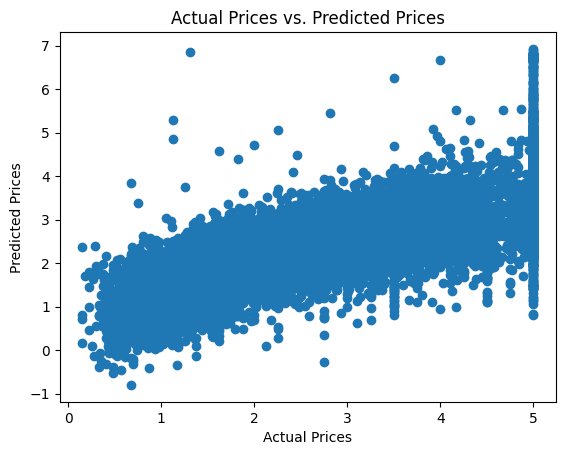

In [11]:
# Plot the original prices vs. predicted prices
plt.scatter(y, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

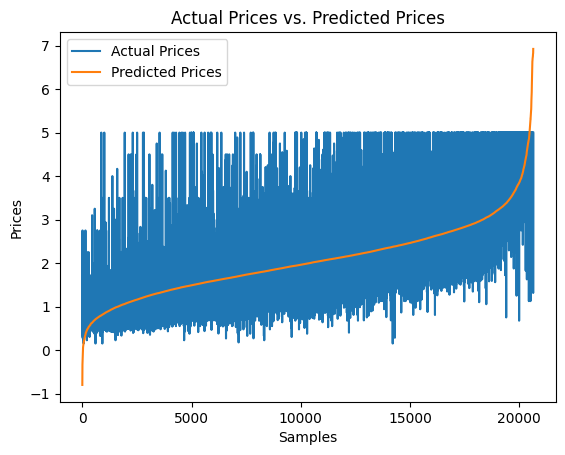

In [12]:
# Sort the actual and predicted prices by the predicted prices
sorted_indices = np.argsort(y_pred.flatten())
sorted_y = y[sorted_indices]
sorted_y_pred = y_pred.flatten()[sorted_indices]

# Plot the sorted actual prices and sorted predicted prices
plt.plot(sorted_y, label='Actual Prices')
plt.plot(sorted_y_pred, label='Predicted Prices')
plt.xlabel('Samples')
plt.ylabel('Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()
